# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

COVID-19 cases by notification date and postcode, local health district (Lhd), local government area (Lga) and likely source of infection. The dataset is updated daily, except on weekends.

Messing about with the [NSW COVID-19 cases by location and likely source of infection](https://data.nsw.gov.au/search/dataset/ds-nsw-ckan-97ea2424-abaf-4f3e-a9f2-b5c883f42b6a/details?q=)

`imports`, you've seen this before!

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [6]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [7]:
plt.rcParams['figure.figsize'] = (10, 5)

In [8]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [9]:
if os.path.isfile("confirmed_cases_table4_location_likely_source.csv"):
    filepath = "confirmed_cases_table4_location_likely_source.csv"
    print("loading from file")
else:
    filepath = "https://data.nsw.gov.au/data/dataset/97ea2424-abaf-4f3e-a9f2-b5c883f42b6a/resource/2776dbb8-f807-4fb2-b1ed-184a6fc2c8aa/download/confirmed_cases_table4_location_likely_source.csv"
    print("loading from the internet")

covid_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [10]:
covid_data.head(10)

,notification_date,postcode,likely_source_of_infection,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19
0,2020-01-25,2134,Overseas,X700,Sydney,11300.0,Burwood (A)
1,2020-01-25,2121,Overseas,X760,Northern Sydney,16260.0,Parramatta (C)
2,2020-01-25,2071,Overseas,X760,Northern Sydney,14500.0,Ku-ring-gai (A)
3,2020-01-27,2033,Overseas,X720,South Eastern Sydney,16550.0,Randwick (C)
4,2020-03-01,2077,Overseas,X760,Northern Sydney,14000.0,Hornsby (A)
5,2020-03-01,2163,Overseas,X710,South Western Sydney,12850.0,Fairfield (C)
6,2020-03-02,2073,Locally acquired - no links to known case or c...,X760,Northern Sydney,14500.0,Ku-ring-gai (A)
7,2020-03-02,2217,Overseas,X720,South Eastern Sydney,10500.0,Bayside (A)
8,2020-03-02,2077,Locally acquired - linked to known case or clu...,X760,Northern Sydney,14000.0,Hornsby (A)
9,2020-03-03,2200,Overseas,X710,South Western Sydney,11570.0,Canterbury-Bankstown (A)


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

local hospital district code, counting how much times

In [11]:
covid_data.lhd_2010_code

0        X700
1        X760
2        X760
3        X720
4        X760
         ... 
12051    X750
12052    X710
12053    X710
12054    X710
12055    X740
Name: lhd_2010_code, Length: 12056, dtype: object

local health districts

1	X700	Sydney;
2	X710	South Western Sydney;
3	X720	South Eastern Sydney;
4	X730	Illawarra Shoalhaven;
5	X740	Western Sydney;
6	X750	Nepean Blue Mountains;
7	X760	Northern Sydney;
8	X770	Central Coast;
9	X800	Hunter New England;
10	X810	Northern NSW;
11	X820	Mid North Coast;
12	X830	Southern NSW;
13	X840	Murrumbidgee;
14	X850	Western NSW;
15	X860	Far West;

In [51]:
lhd_count = covid_data.lhd_2010_code
covid_data.lhd_2010_code.groupby('X700').count().reset_index(name="case_number")

KeyError: 'X700'

sort by notification date, with local hospital district name, code and case number in total

In [38]:
covid_data.groupby(["notification_date","lhd_2010_name", "lhd_2010_code"])["notification_date"].count().reset_index(name="case_number")
(covid_data['lhd_2010_code']=='X700').sum()

1387

X760 Northern Sydeny case intotal 

In [36]:
covid_data.groupby(["notification_date","lhd_2010_name", "lhd_2010_code"])["lhd_2010_code"].count().reset_index(name="case_number")
covid_data

covid_data.lhd_2010_code == 'X760'

len(covid_data[covid_data['lhd_2010_code'] == 'X760'])

945

X700 Sydeny intoatal

In [37]:
covid_data['lhd_2010_code']=='X700'


(covid_data['lhd_2010_code']=='X700').sum()

1387

In [15]:
covid_data['lhd_2010_code']=='X760'

0        False
1         True
2         True
3        False
4         True
         ...  
12051    False
12052    False
12053    False
12054    False
12055    False
Name: lhd_2010_code, Length: 12056, dtype: bool

<AxesSubplot:>

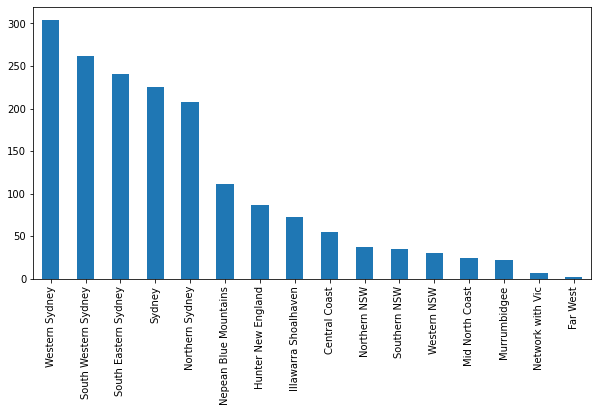

In [16]:
new_group = covid_data.groupby(["notification_date","lhd_2010_name", "lhd_2010_code"])["notification_date"].count().reset_index(name="case_number")
new_group["lhd_2010_name"].value_counts().plot(kind="bar")


<AxesSubplot:ylabel='lhd_2010_name'>

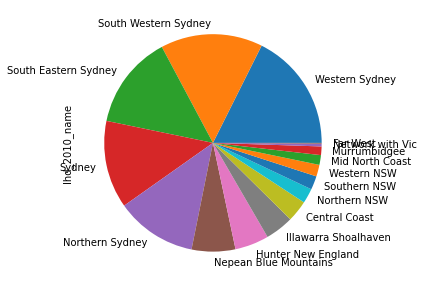

In [17]:
new_group = covid_data.groupby(["notification_date","lhd_2010_name", "lhd_2010_code"])["notification_date"].count().reset_index(name="case_number")
new_group["lhd_2010_name"].value_counts().plot(kind="pie")


In [18]:
number_data = covid_data.groupby(["notification_date","lhd_2010_name", "lhd_2010_code"])["lhd_2010_code"].count().reset_index(name="case_number")

In [19]:
number_data = covid_data.groupby(["notification_date"])["notification_date"].count().reset_index(name="case_number")
number_data

,notification_date,case_number
0,2020-01-25,3
1,2020-01-27,1
2,2020-03-01,2
3,2020-03-02,3
4,2020-03-03,6
...,...,...
501,2021-08-07,261
502,2021-08-08,269
503,2021-08-09,374
504,2021-08-10,337


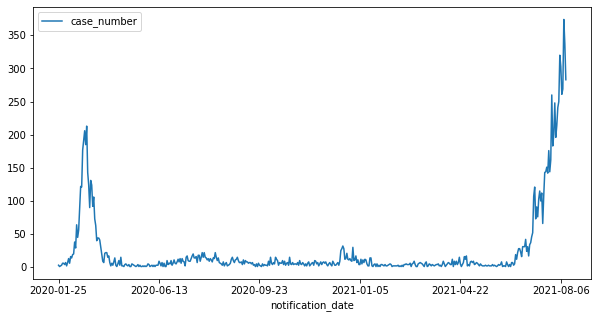

In [20]:
number_data = covid_data.groupby(["notification_date"])["notification_date"].count().reset_index(name="case_number")
ax = number_data.plot.line(x='notification_date', y = 'case_number')

We can also get the list of columns out of the data frame

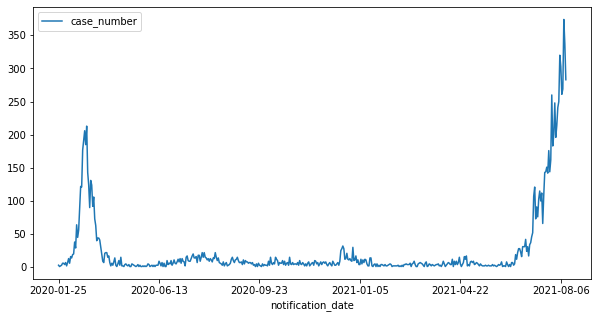

In [21]:
name_data = covid_data.groupby(["lhd_2010_code", "notification_date", "lhd_2010_name"])["notification_date"].count().reset_index(name="case_number")
data_X700 = name_data['lhd_2010_code']=='X700'
name_data_X700 = name_data[data_X700]

name_data.head()

ax = number_data.plot.line(x='notification_date', y = 'case_number')

In [22]:
covid_data.columns

Index(['notification_date', 'postcode', 'likely_source_of_infection',
       'lhd_2010_code', 'lhd_2010_name', 'lga_code19', 'lga_name19'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the iloc property.

This gives us the row as a _Series_.

↓

In [23]:
row_one = covid_data.iloc[0]
row_one

notification_date              2020-01-25
postcode                             2134
likely_source_of_infection       Overseas
lhd_2010_code                        X700
lhd_2010_name                      Sydney
lga_code19                        11300.0
lga_name19                    Burwood (A)
Name: 0, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [24]:
row_one["lhd_2010_code"]

'X700'

In [25]:
row_one.notification_date

'2020-01-25'

Doing the same thing on a dataframe gives us the whole column

In [26]:
covid_data = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['notification_date'],
                           dayfirst=True)

In [27]:
covid_data["notification_date"]

0       2020-01-25
1       2020-01-25
2       2020-01-25
3       2020-01-27
4       2020-03-01
           ...    
12051   2021-08-11
12052   2021-08-11
12053   2021-08-11
12054   2021-08-11
12055   2021-08-11
Name: notification_date, Length: 12056, dtype: datetime64[ns]

<AxesSubplot:>

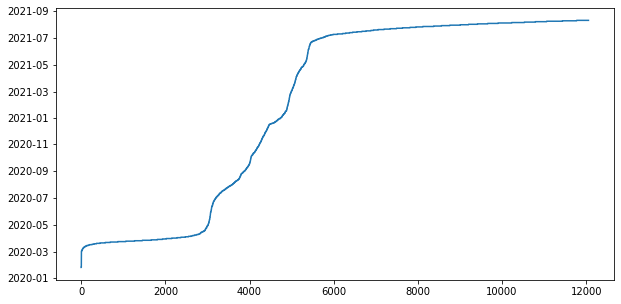

In [28]:
covid_data["notification_date"].plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

<AxesSubplot:>

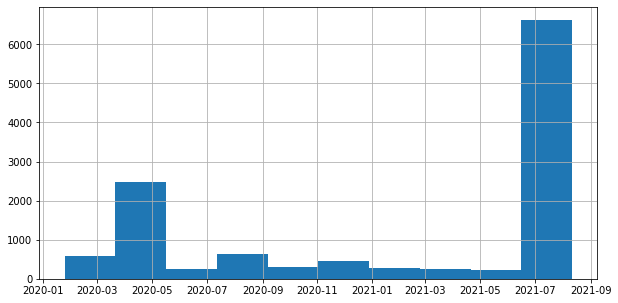

In [29]:
covid_data["notification_date"].hist()

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, boolean indexing:

In [30]:
covid_data.lhd_2010_code[].hist()

SyntaxError: invalid syntax (Temp/ipykernel_15636/1992641844.py, line 1)

That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [ ]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [ ]:
some_numbers[some_numbers < 8]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [ ]:
some_numbers[(some_numbers < 4) | (some_numbers > 97)] #this needs the round brackets,
                                                       # not really sure why.

0      0
1      1
2      2
3      3
98    98
99    99
dtype: int64

In [ ]:
try_this_place = [("Overseas" in infection_source) for infection_source in covid_data]
print 

We can be _really fancy_ too!

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [ ]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",
        "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca",   
        "guineafowl", "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal",
        "turkey", "Goldfish", "rabbit", "Koi", "canary", "Society finch", "Fancy mouse",
        "Siamese fighting fish", "Fancy rat and Lab rat", "mink", "red fox", "hedgehog",
        "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = [("n" in pet_name) for pet_name in pets_series]
print("pattern:",pattern_of_bools) # , list(zip(pattern_of_bools, pets))

pets_series[pattern_of_bools]

pattern: [False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False]


7                   Chicken
8                Guinea pig
9                    Donkey
12        Western honey bee
16                   pigeon
19           Bactrian camel
22               guineafowl
32                   canary
33            Society finch
34              Fancy mouse
35    Siamese fighting fish
36    Fancy rat and Lab rat
37                     mink
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [ ]:
pets_we_care_about = []
for p in pets:
    if len(p)==4:
        pets_we_care_about.append(p)
pets_we_care_about

['Goat', 'Zebu', 'duck', 'mink']

This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [ ]:
[p for p in pets]

['Dog',
 'Goat',
 'pig',
 'Sheep',
 'Cattle',
 'Zebu',
 'Cat',
 'Chicken',
 'Guinea pig',
 'Donkey',
 'duck',
 'Water buffalo',
 'Western honey bee',
 'dromedary camel',
 'Horse',
 'silkmoth',
 'pigeon',
 'goose',
 'Yak',
 'Bactrian camel',
 'Llama',
 'Alpaca',
 'guineafowl',
 'Ferret',
 'muscovy duck',
 'Barbary dove',
 'Bali cattle',
 'Gayal',
 'turkey',
 'Goldfish',
 'rabbit',
 'Koi',
 'canary',
 'Society finch',
 'Fancy mouse',
 'Siamese fighting fish',
 'Fancy rat\xa0and\xa0Lab rat',
 'mink',
 'red fox',
 'hedgehog',
 'Guppy']

This one converts the list to uppercase while it's doing the transfer

In [ ]:
[p.upper() for p in pets]

['DOG',
 'GOAT',
 'PIG',
 'SHEEP',
 'CATTLE',
 'ZEBU',
 'CAT',
 'CHICKEN',
 'GUINEA PIG',
 'DONKEY',
 'DUCK',
 'WATER BUFFALO',
 'WESTERN HONEY BEE',
 'DROMEDARY CAMEL',
 'HORSE',
 'SILKMOTH',
 'PIGEON',
 'GOOSE',
 'YAK',
 'BACTRIAN CAMEL',
 'LLAMA',
 'ALPACA',
 'GUINEAFOWL',
 'FERRET',
 'MUSCOVY DUCK',
 'BARBARY DOVE',
 'BALI CATTLE',
 'GAYAL',
 'TURKEY',
 'GOLDFISH',
 'RABBIT',
 'KOI',
 'CANARY',
 'SOCIETY FINCH',
 'FANCY MOUSE',
 'SIAMESE FIGHTING FISH',
 'FANCY RAT\xa0AND\xa0LAB RAT',
 'MINK',
 'RED FOX',
 'HEDGEHOG',
 'GUPPY']

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

In [ ]:
[p for p in pets if len(p)==4]

['Goat', 'Zebu', 'duck', 'mink']

And this one is doing both

In [ ]:
[p.upper() for p in pets if len(p)==5]

['SHEEP', 'HORSE', 'GOOSE', 'LLAMA', 'GAYAL', 'GUPPY']

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

<AxesSubplot:>

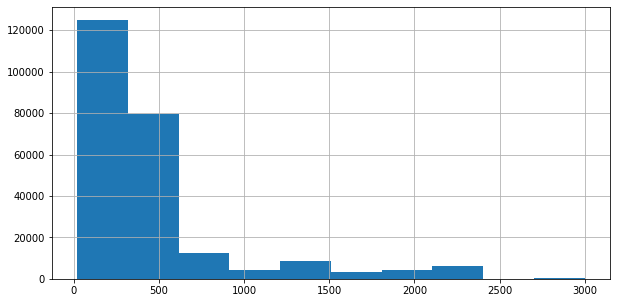

In [ ]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 3000].hist()

Let's see what's under $1000

<AxesSubplot:>

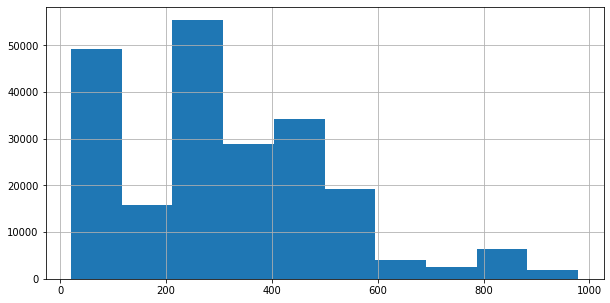

In [ ]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000].hist()

This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [ ]:
penalty_data.head(2)

,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,RED_LIGHT_CAMERA_IND,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE
0,2011-2012,01/07/2011,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238
1,2011-2012,01/07/2011,8469,Stop on/near marked foot crossing,ROAD RULES 2008,173(1),265,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,78,20670


We can see that `FACE_VALUE` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [ ]:
covid_data["postcode"].value_counts()

2165    290
2176    279
2145    158
2026    154
2170     97
       ... 
2319      1
2711      1
2454      1
2643      1
1730      1
Name: postcode, Length: 426, dtype: int64

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

<AxesSubplot:>

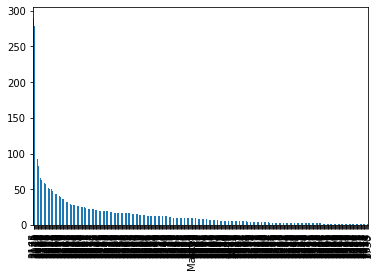

In [ ]:
covid_data["postcode"].value_counts().plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 

![some common distributions and their relationships](https://storage.ning.com/topology/rest/1.0/file/get/136706870?profile=original&width=600) from [here](https://www.datasciencecentral.com/profiles/blogs/common-probability-distributions-the-data-scientist-s-crib-sheet)

<AxesSubplot:>

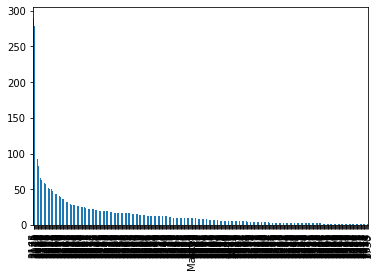

In [ ]:
pdvc = covid_data["postcode"].value_counts()
pdvc[pdvc < 1000].plot(kind="bar")

This pattern keeps repeating itself:

<AxesSubplot:>

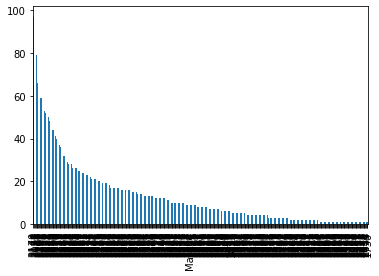

In [ ]:
pdvc[pdvc < 100].plot(kind="bar")

<AxesSubplot:>

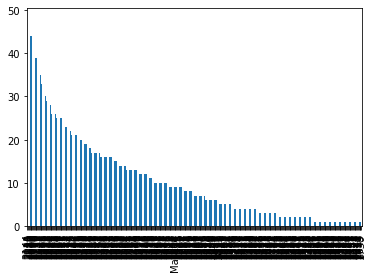

In [ ]:
pdvc[pdvc < 50].plot(kind="bar")

<AxesSubplot:>

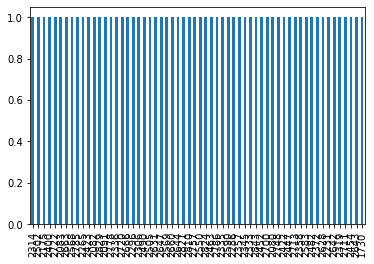

In [ ]:
pdvc[pdvc < 2].plot(kind="bar")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [ ]:
# This bit makes some random data. Ignore it
mu = 100
sigma = 15
x = mu + sigma*np.random.randn(10000)

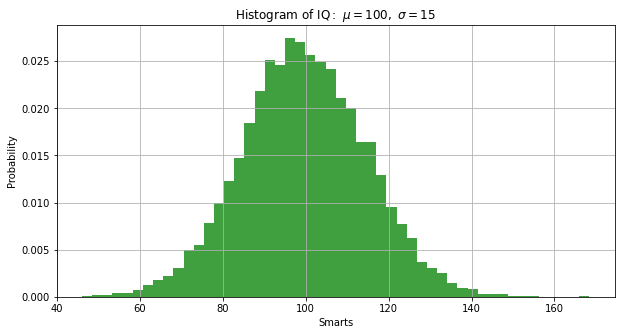

In [ ]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
plt.grid(True)
# plt.show()

Here's how we made our histogram before:

<AxesSubplot:>

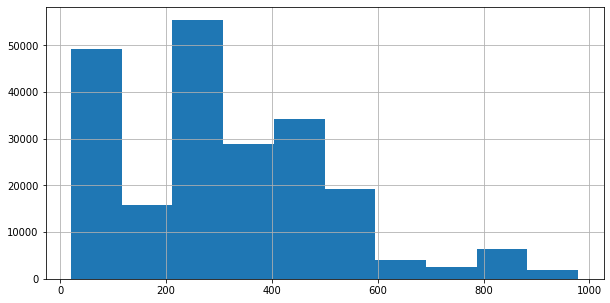

In [ ]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000].hist()

This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using matpolotlib directly:

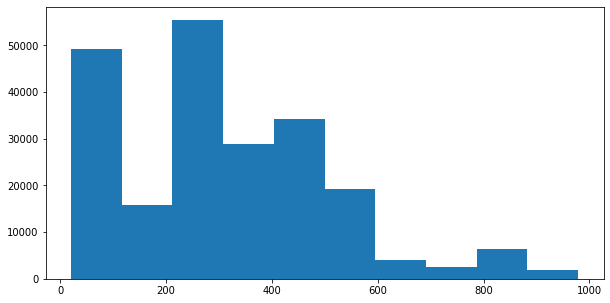

In [ ]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data)
plt.show()

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

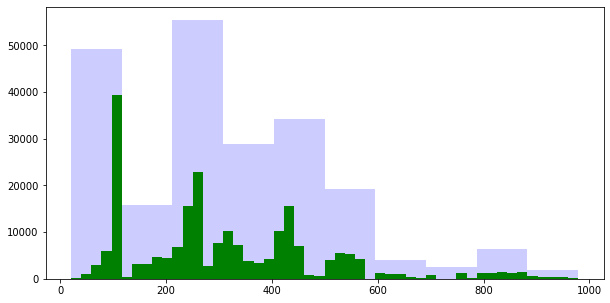

In [ ]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data, bins=10, facecolor='blue', alpha=0.2) #<-old one
plt.hist(capped_face_value_data, bins=50, facecolor='green', alpha=1)  #<-new one
plt.show()

We can go back to our initial, unfiltered, data:

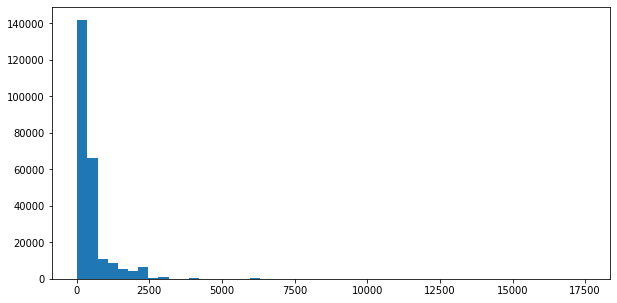

In [ ]:
plt.hist(penalty_data["FACE_VALUE"], bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

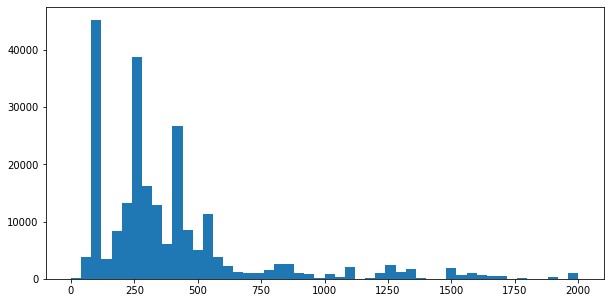

In [ ]:
plt.hist(penalty_data["FACE_VALUE"], bins=50, range=(0, 2000))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

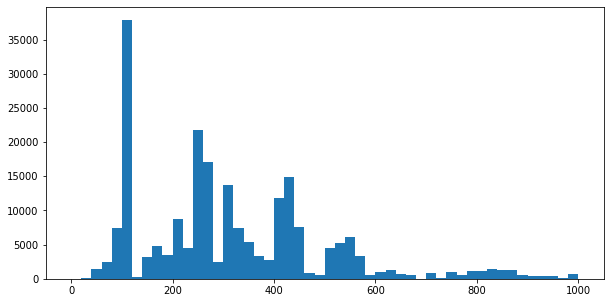

In [ ]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.show()

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object:

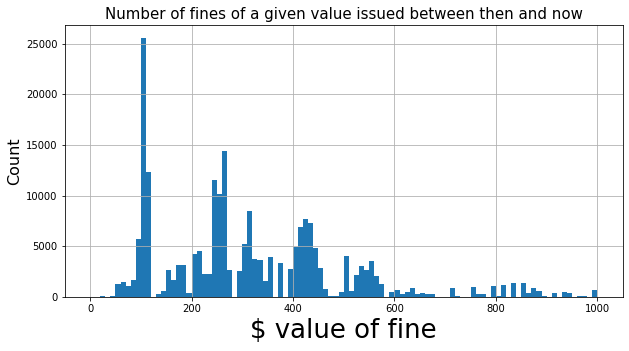

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued in this period", fontsize=15)
plt.xlabel('$ value of fine', fontsize=26)
plt.ylabel('Count', fontsize=16)
plt.grid(True)
plt.show()

We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [ ]:
penalty_data = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['OFFENCE_MONTH'],
                           dayfirst=True)
penalty_data.head(2)

,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,RED_LIGHT_CAMERA_IND,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238
1,2011-2012,2011-07-01,8469,Stop on/near marked foot crossing,ROAD RULES 2008,173(1),265,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,78,20670


This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [ ]:
f"range is: {penalty_data.OFFENCE_MONTH.min()} to {penalty_data.OFFENCE_MONTH.max()}"

'range is: 2011-07-01 00:00:00 to 2017-02-01 00:00:00'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [ ]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.min(), date_format_pattern)
latest_date   = datetime.strftime(penalty_data.OFFENCE_MONTH.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

'range is: July, 2011 to February, 2017'

Which means that we can put those values into our graph title:

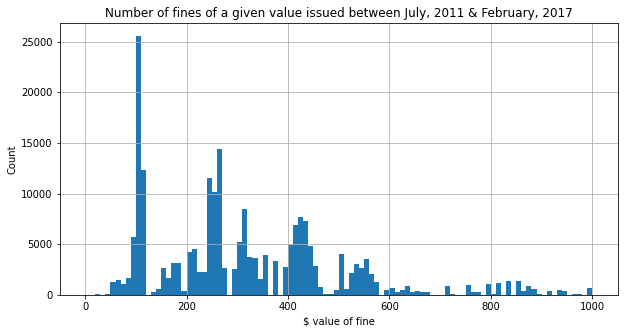

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title(f"Number of fines of a given value issued between {earliest_date} & {latest_date}", fontsize=12)
plt.xlabel('$ value of fine', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(True)
plt.show()

We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

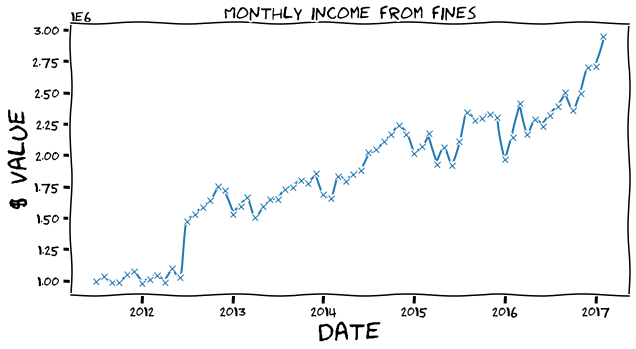

In [ ]:
income = penalty_data[["OFFENCE_MONTH","FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel('Date', fontsize=26)
plt.ylabel('$ Value', fontsize=26)
plt.grid(True)
plt.show()

In [ ]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940:

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [ ]:
ss = penalty_data.loc[:5]

Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [ ]:
ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(2)

<ipython-input-191-beb3bd65b756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,46,16238,1,1
1,2011-2012,2011-07-01,8469,Stop on/near marked foot crossing,ROAD RULES 2008,173(1),265,NaN,NaN,NaN,...,NaN,NaN,Y,NaN,NaN,NaN,78,20670,1,1


Above is equivalent to below, it's up to you to decide what is more readable.

In [ ]:
def my_f(x):
    return x.OFFENCE_MONTH.day

ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)

<ipython-input-192-ebf8f59cf10c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_function"] = ss.apply(my_f, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda,day_from_function
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,46,16238,1,1,1


Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A") 

ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)

<ipython-input-194-e3cd89590808>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["nice_day"] = ss.apply(my_f, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda,day_from_function,nice_day
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,46,16238,1,1,1,Friday


Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

<AxesSubplot:>

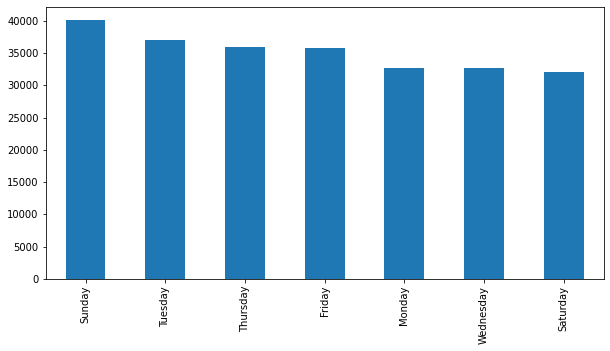

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A") 

penalty_data["nice_day"] = penalty_data.apply(my_f, axis=1)
penalty_data.nice_day.value_counts().plot(kind="bar")

And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [ ]:
def fold(given):
    """Return canonical versions of inputs."""
    
    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickehead!": ben_name_cannonical
    }

#     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)

print(fold("New-south"))
print(fold("BDoh"))

uni of stairs
Ben Doherty


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_